# K Nearest Neighbors from Scratch

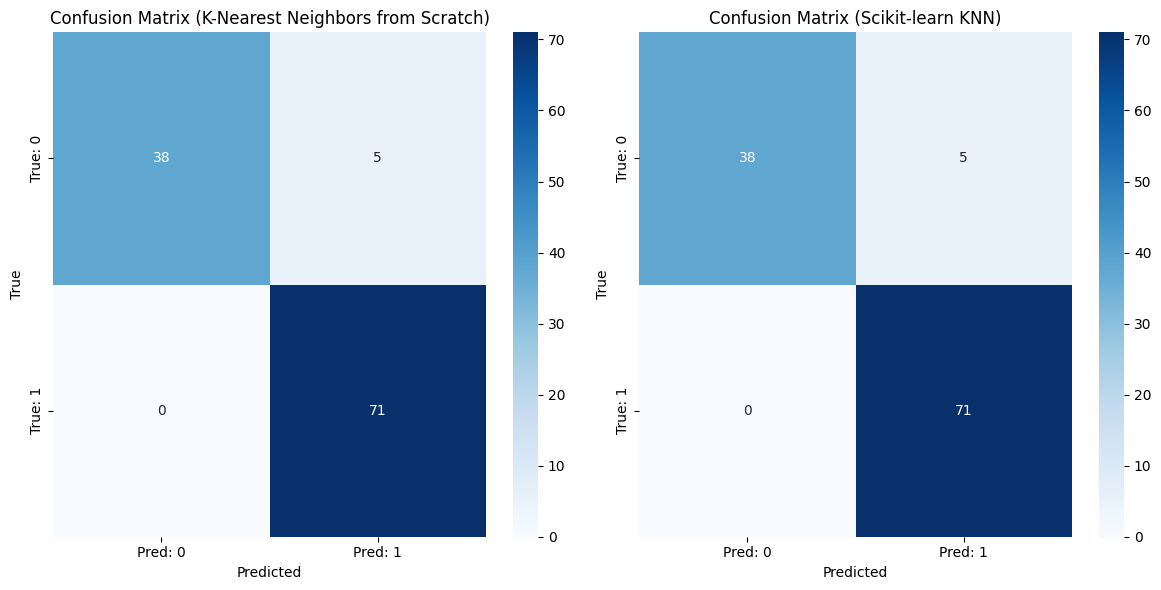

Accuracy (KNN from Scratch): 95.61%
Accuracy (Scikit-learn KNN): 95.61%


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# 1. k-nearest neighbors (knn) from scratch
class KNearestNeighborsScratch:
    def __init__(self, k=3):
        self.k = k

    def _euclidean_distance(self, x1, x2):
        # calculate euclidean distance between two points
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def fit(self, X, y):
        # store training data
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        # predict class labels for the input samples
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        # compute distances between the input and all training samples
        distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]
        # get the indices of the k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]
        # get the labels of the k nearest neighbors
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # return the most common class label among the k neighbors
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

# 2. load dataset
data = load_breast_cancer()
X = data.data  # features
y = data.target  # labels

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. train k-nearest neighbors from scratch
knn_scratch = KNearestNeighborsScratch(k=5)  # you can adjust k as needed
knn_scratch.fit(X_train, y_train)
y_pred_scratch_knn = knn_scratch.predict(X_test)

# 4. train k-nearest neighbors using scikit-learn
knn_sklearn = KNeighborsClassifier(n_neighbors=5)
knn_sklearn.fit(X_train, y_train)
y_pred_sklearn_knn = knn_sklearn.predict(X_test)

# 5. compute confusion matrices for both models
cm_scratch_knn = confusion_matrix(y_test, y_pred_scratch_knn)
cm_sklearn_knn = confusion_matrix(y_test, y_pred_sklearn_knn)

# plot confusion matrices for both models
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# knn from scratch confusion matrix
sns.heatmap(cm_scratch_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['pred: 0', 'pred: 1'], yticklabels=['true: 0', 'true: 1'], ax=axs[0])
axs[0].set_title('confusion matrix (k-nearest neighbors from scratch)')
axs[0].set_xlabel('predicted')
axs[0].set_ylabel('true')

# scikit-learn knn confusion matrix
sns.heatmap(cm_sklearn_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['pred: 0', 'pred: 1'], yticklabels=['true: 0', 'true: 1'], ax=axs[1])
axs[1].set_title('confusion matrix (scikit-learn knn)')
axs[1].set_xlabel('predicted')
axs[1].set_ylabel('true')

plt.tight_layout()
plt.show()

# 6. compare the accuracy of both models
accuracy_scratch_knn = np.mean(y_pred_scratch_knn == y_test)
accuracy_sklearn_knn = np.mean(y_pred_sklearn_knn == y_test)

print(f"accuracy (knn from scratch): {accuracy_scratch_knn * 100:.2f}%")
print(f"accuracy (scikit-learn knn): {accuracy_sklearn_knn * 100:.2f}%")